The goal of this notebook is to reproduce graphs from relevant papers to make sure that our process matches or closely matches other output. 

## Castle, et. al (2014)

In this paper, the authors focus on groundwater depletion in the Colorado River Basin. They have several charts relevant for comparisons, including one that has terrestrial water storage anomalies using GRACE data. To verify we are processing our data correctly, I will recreate the TWSA chart they have for the whole basin, pictured below: 

<p align="center">
    <img src="../notebooks-and-markdowns/whole_basin_castlepaper.png" width="800" />
</p>

A few technical things to note for their methods: 

+ They use GRACE RL05 from CSR
+ Their deviations are calculated as deviations from the mean during the study period of Jan 2003-Nov 2013
+ Since they use spherical harmonics data, their pixel size is 1 degree by 1 degree

Our process: 

+ load in GRACE
+ combine into a dataframe 
+ calculate deviation from the mean for Jan 2003-Nov 2013
+ average over the basin 
+ graph 

It's hard to find the right files in the archives to download, let's start with the version of GRACE spherical harmonics we have downloaded. 

In [7]:
# Defining path to GRACE data
p = "/home/kmk58/remoteData/GRACE/data/TELLUS_GRAC_L3_CSR_RL06_LND_v04/"

In [8]:
import geopandas as gpd 
import matplotlib.pyplot as plt

shpfl = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_Hydrological_Boundaries_with_Areas_served_by_Colorado_River.shp")
# Code to filter to shapefile

# extract a dataframe of the coordinates from the shapefile
coords = shpfl.get_coordinates()
# find the maximum and minimum lat/longs, corresponding to the red points on the figure above
lon_min = min(coords['x'])
lon_max = max(coords['x'])
lat_min = min(coords['y'])
lat_max = max(coords['y'])

In [180]:
import xarray as xr
import os
import pandas as pd
import numpy as np

os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

crb_df = pd.DataFrame()

#Iterating through files in path
for filename in os.listdir(p):
    if filename.endswith(".nc"):
    #Reading in data as xarray then converting to DataFrame
        xd = xr.open_dataset(p+str(filename))
        xd_df = xd.to_dataframe()
        xd_df.reset_index(inplace=True)
        xd_df["lon"] = xd_df["lon"] - 180
    
        #Extracting only needed columns 
        int_df = xd_df[['lon','lat','time','lwe_thickness','uncertainty']]    
    
        #Index where CRB Basin is 
        #df_slice = int_df[(int_df.lon.isin(list(np.arange(-90.5,-100,-0.5)))) & (int_df.lat.isin(list(np.arange(30.5,40,0.5))))]
        df_slice = int_df[(int_df.lon> lon_min) & (int_df.lon < lon_max)]
        df_slice = df_slice[(df_slice.lat> lat_min) & (df_slice.lat < lat_max)]
        crb_df = pd.concat([crb_df, df_slice], axis=0)
    


In [181]:
crb_df = crb_df.drop_duplicates()
crb_df['lon/lat']=crb_df['lat'].astype(str) + crb_df['lon'].astype(str) 

In [182]:
crb_df

,lon,lat,time,lwe_thickness,uncertainty,lon/lat
22202,-118.5,31.5,2017-06-10 12:00:00,-0.034839,0.025026,31.5-118.5
22204,-118.5,32.5,2017-06-10 12:00:00,-0.042626,0.024973,32.500000000000014-118.5
22206,-118.5,33.5,2017-06-10 12:00:00,-0.051571,0.024918,33.5-118.5
22208,-118.5,34.5,2017-06-10 12:00:00,-0.051942,0.024864,34.500000000000014-118.5
22210,-118.5,35.5,2017-06-10 12:00:00,-0.038551,0.024813,35.50000000000001-118.5
...,...,...,...,...,...,...
27976,-102.5,38.5,2002-04-18 00:00:00,-0.019572,0.022868,38.49999999999999-102.5
27978,-102.5,39.5,2002-04-18 00:00:00,0.003483,0.022870,39.50000000000001-102.5
27980,-102.5,40.5,2002-04-18 00:00:00,0.026293,0.022892,40.49999999999999-102.5
27982,-102.5,41.5,2002-04-18 00:00:00,0.042169,0.022930,41.500000000000014-102.5


In [183]:
# There is no scale factor file I can find, let's do without first. 
# need to create an average grid value for each grid over the time period (Jan 2003-Nov 2013)

period_df = crb_df[crb_df['time'].dt.strftime('%Y-%m-%d') <= "2013-11-31"]
period_df = period_df[period_df['time'].dt.strftime('%Y-%m-%d') >= "2003-01-01"]
period_df['lon/lat']=period_df['lat'].astype(str) + period_df['lon'].astype(str) 



In [184]:
period_df

,lon,lat,time,lwe_thickness,uncertainty,lon/lat
22202,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5
22204,-118.5,32.5,2013-11-16 00:00:00,-0.096024,0.014992,32.500000000000014-118.5
22206,-118.5,33.5,2013-11-16 00:00:00,-0.103721,0.014959,33.5-118.5
22208,-118.5,34.5,2013-11-16 00:00:00,-0.108368,0.014927,34.500000000000014-118.5
22210,-118.5,35.5,2013-11-16 00:00:00,-0.105244,0.014896,35.50000000000001-118.5
...,...,...,...,...,...,...
27976,-102.5,38.5,2003-01-16 12:00:00,-0.040100,0.028097,38.49999999999999-102.5
27978,-102.5,39.5,2003-01-16 12:00:00,-0.025434,0.028099,39.50000000000001-102.5
27980,-102.5,40.5,2003-01-16 12:00:00,-0.012313,0.028126,40.49999999999999-102.5
27982,-102.5,41.5,2003-01-16 12:00:00,-0.000814,0.028172,41.500000000000014-102.5


In [185]:
import math

period_df['index1']=period_df.index

surface_area_array = np.array([6371000000*math.radians(.5)*6371000000*math.radians(1)*math.cos(math.radians(lat)) for lat in period_df.lat.values])
test = pd.DataFrame(surface_area_array, columns=['surface_area'])
test['index1']=test.index
#surface_area_array = np.array([6371000*math.radians(grace_coords['lat_interval_size'])*6371000*math.radians(grace_coords['lon_interval_size'])*math.cos(math.radians(grace_coords['lat']))])
ds_test = period_df.merge(test)
ds_test = ds_test[['lon','lat','surface_area']]
ds_test

,lon,lat,surface_area
0,-118.5,31.5,2.577606e+15
1,-118.5,31.5,2.577606e+15
2,-118.5,31.5,2.577606e+15
3,-118.5,31.5,2.577606e+15
4,-118.5,31.5,2.577606e+15
...,...,...,...
12418,-110.5,35.5,2.315080e+15
12419,-110.5,35.5,2.315080e+15
12420,-110.5,35.5,2.315080e+15
12421,-110.5,35.5,2.315080e+15


In [186]:
period_df = period_df.merge(ds_test, on=['lon','lat'])

In [187]:
period_df

,lon,lat,time,lwe_thickness,uncertainty,lon/lat,index1,surface_area
0,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15
1,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15
2,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15
3,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15
4,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15
...,...,...,...,...,...,...,...,...
1528024,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15
1528025,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15
1528026,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15
1528027,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15


In [188]:
period_df_nosa = period_df[['lon/lat', 'lwe_thickness']].groupby(['lon/lat']).mean().reset_index()
period_df_nosa["grid_mean"] = period_df_nosa['lwe_thickness']
period_df_nosa = period_df_nosa[['lon/lat','grid_mean']]

In [189]:
period_df_nosa

,lon/lat,grid_mean
0,31.5-110.5,-0.002832
1,31.5-111.5,-0.004685
2,31.5-112.5,-0.006203
3,31.5-113.5,-0.007365
4,31.5-114.5,-0.008234
...,...,...
96,42.5-114.5,-0.000643
97,42.5-115.5,-0.001625
98,42.5-116.5,-0.002645
99,42.5-117.5,-0.003800


In [190]:
crb_df_nosa = crb_df.merge(period_df_nosa, how="left", on='lon/lat')

crb_df_nosa['estimate'] = crb_df_nosa['lwe_thickness']-crb_df_nosa['grid_mean']
crb_df_nosa


,lon,lat,time,lwe_thickness,uncertainty,lon/lat,grid_mean,estimate
0,-118.5,31.5,2017-06-10 12:00:00,-0.034839,0.025026,31.5-118.5,-0.010399,-0.024440
1,-118.5,32.5,2017-06-10 12:00:00,-0.042626,0.024973,32.500000000000014-118.5,-0.010012,-0.032614
2,-118.5,33.5,2017-06-10 12:00:00,-0.051571,0.024918,33.5-118.5,-0.009433,-0.042138
3,-118.5,34.5,2017-06-10 12:00:00,-0.051942,0.024864,34.500000000000014-118.5,-0.008392,-0.043550
4,-118.5,35.5,2017-06-10 12:00:00,-0.038551,0.024813,35.50000000000001-118.5,-0.006883,-0.031668
...,...,...,...,...,...,...,...,...
33247,-102.5,38.5,2002-04-18 00:00:00,-0.019572,0.022868,38.49999999999999-102.5,NaN,NaN
33248,-102.5,39.5,2002-04-18 00:00:00,0.003483,0.022870,39.50000000000001-102.5,NaN,NaN
33249,-102.5,40.5,2002-04-18 00:00:00,0.026293,0.022892,40.49999999999999-102.5,NaN,NaN
33250,-102.5,41.5,2002-04-18 00:00:00,0.042169,0.022930,41.500000000000014-102.5,NaN,NaN


In [191]:
tws_crb = crb_df_nosa[['time','estimate']]
tws_crb = tws_crb.groupby(['time']).mean().reset_index()

tws_crb = tws_crb[tws_crb['time'].dt.strftime('%Y-%m-%d') <= "2013-11-31"]
tws_crb = tws_crb[tws_crb['time'].dt.strftime('%Y-%m-%d') >= "2003-01-01"]

In [192]:
tws_crb

,time,estimate
7,2003-01-16 12:00:00,-0.002332
8,2003-02-15 00:00:00,0.002814
9,2003-03-16 12:00:00,0.054551
10,2003-04-16 00:00:00,0.052302
11,2003-05-11 12:00:00,0.071154
...,...,...
125,2013-05-16 12:00:00,0.009714
126,2013-06-16 00:00:00,-0.015883
127,2013-07-16 12:00:00,-0.030287
128,2013-10-16 12:00:00,-0.068784


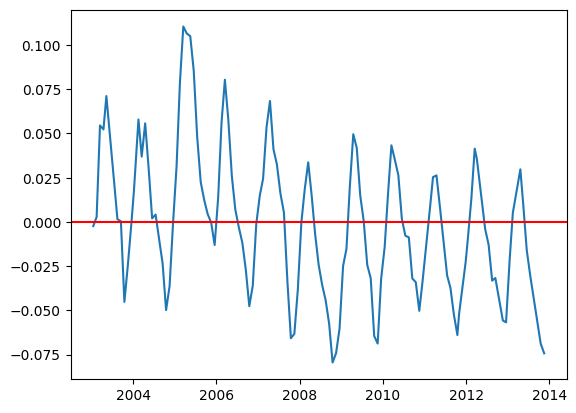

In [193]:
import matplotlib.pyplot as plt

plt.plot('time', 'estimate', data=tws_crb)
plt.axhline(0, color='red')
plt.show()

In [194]:
# let's incorporate surface water: 

period_df['surfacearea_estimate'] = period_df['lwe_thickness'] * period_df['surface_area']

In [195]:
period_df

,lon,lat,time,lwe_thickness,uncertainty,lon/lat,index1,surface_area,surfacearea_estimate
0,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14
1,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14
2,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14
3,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14
4,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14
...,...,...,...,...,...,...,...,...,...
1528024,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13
1528025,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13
1528026,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13
1528027,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13


In [196]:
period_df_sa = period_df[['lon/lat', 'surfacearea_estimate']].groupby(['lon/lat']).mean().reset_index()
period_df_sa["grid_mean"] = period_df_sa['surfacearea_estimate']
period_df_sa = period_df_nosa[['lon/lat','grid_mean']]
period_df_sa

,lon/lat,grid_mean
0,31.5-110.5,-0.002832
1,31.5-111.5,-0.004685
2,31.5-112.5,-0.006203
3,31.5-113.5,-0.007365
4,31.5-114.5,-0.008234
...,...,...
96,42.5-114.5,-0.000643
97,42.5-115.5,-0.001625
98,42.5-116.5,-0.002645
99,42.5-117.5,-0.003800


In [197]:
crb_df_sa = period_df.merge(period_df_sa, how="left", on='lon/lat')

crb_df_sa['surfacearea_estimate'] = crb_df_sa['surfacearea_estimate']-crb_df_sa['grid_mean']
crb_df_sa

,lon,lat,time,lwe_thickness,uncertainty,lon/lat,index1,surface_area,surfacearea_estimate,grid_mean
0,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14,-0.010399
1,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14,-0.010399
2,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14,-0.010399
3,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14,-0.010399
4,-118.5,31.5,2013-11-16 00:00:00,-0.089809,0.015024,31.5-118.5,22202,2.577606e+15,-2.314934e+14,-0.010399
...,...,...,...,...,...,...,...,...,...,...
1528024,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13,-0.004013
1528025,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13,-0.004013
1528026,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13,-0.004013
1528027,-110.5,35.5,2003-01-16 12:00:00,-0.041186,0.028226,35.50000000000001-110.5,25090,2.315080e+15,-9.534806e+13,-0.004013


In [198]:
tws_crb_sa = crb_df_sa[['time','surfacearea_estimate']]
tws_crb_sa = tws_crb_sa.groupby(['time']).mean().reset_index()

tws_crb_sa = tws_crb_sa[tws_crb_sa['time'].dt.strftime('%Y-%m-%d') <= "2013-11-31"]
tws_crb_sa = tws_crb_sa[tws_crb_sa['time'].dt.strftime('%Y-%m-%d') >= "2003-01-01"]

In [199]:
tws_crb_sa['sa_estimate_converted'] = tws_crb_sa['surfacearea_estimate']/(1e15)

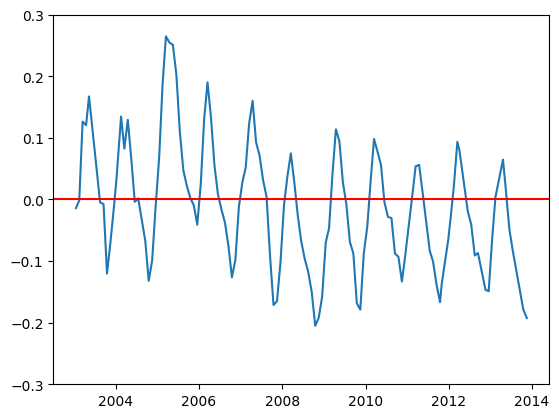

In [205]:
plt.plot('time', 'sa_estimate_converted', data=tws_crb_sa)
plt.axhline(0, color='red')
plt.ylim(-.3,.3)
plt.show()

Recall the earlier graph: 

<p align="center">
    <img src="../notebooks-and-markdowns/whole_basin_castlepaper.png" width="800" />
</p>
